In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


# Tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

tf.executing_eagerly()
tf.compat.v1.enable_eager_execution()
tf.executing_eagerly()



True

In [3]:
matrix1 = [[1.0, 2.0], [3.0, 40]]
matrix2 = np.array([[1.0, 2.0], [3.0, 40]], dtype=np.float32)
matrix3 = tf.constant([[1.0, 2.0], [3.0, 40]])

print(type(matrix1))
print(type(matrix2))
print(type(matrix3))

<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


##Convert  List, Numpy arrays into Tensors

In [4]:
tensorForM1 = tf.convert_to_tensor(matrix1, dtype=tf.float32)
tensorForM2 = tf.convert_to_tensor(matrix2, dtype=tf.float32)
tensorForM3 = tf.convert_to_tensor(matrix3, dtype=tf.float32)

print(type(tensorForM1))
print(type(tensorForM2))
print(type(tensorForM3))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


##Matrix Element-wise and dot product 

In [5]:
mat1 = tf.constant([[4, 5, 6],[3,2,1]])
mat2 = tf.constant([[7, 8, 9],[10, 11, 12]])

# hadamard product (element wise)
mult = tf.multiply(mat1, mat2)

# dot product (no. of rows = no. of columns)
dotprod = tf.matmul(mat1, tf.transpose(mat2))

mult, dotprod

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[28, 40, 54],
        [30, 22, 12]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[122, 167],
        [ 46,  64]], dtype=int32)>)

##Trace Operator

In [6]:
mat_prior = tf.constant([
 [0, 1, 2],
 [3, 4, 5],
 [6, 7, 8]
], dtype=tf.float32)

# get trace ('sum of diagonal elements') of the matrix
mat = tf.linalg.trace(mat_prior)
mat

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

##Transpose

In [7]:
tf.transpose(mat_prior)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 3., 6.],
       [1., 4., 7.],
       [2., 5., 8.]], dtype=float32)>

##Matrix Diagonals

In [8]:
mat = tf.constant([
 [0, 1, 2],
 [3, 4, 5],
 [6, 7, 8]
], dtype=tf.float32)

# get diagonal of the matrix
diag_mat = tf.linalg.diag_part(mat)

# create matrix with given diagonal
mat = tf.linalg.diag([1,2,3,4])
diag_mat, mat

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 4., 8.], dtype=float32)>,
 <tf.Tensor: shape=(4, 4), dtype=int32, numpy=
 array([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4]], dtype=int32)>)

##Identity Matrix

In [9]:
identity = tf.linalg.eye(3)
identity

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

##Matrix Inverse

In [10]:
mat = tf.constant([[3, 3, 4], [5, 6, 7], [8, 9, 10]], dtype=tf.float32)
# print(mat)
# mat=tf.linalg.eye(3)
inv_mat = tf.linalg.inv(tf.transpose(mat))
mat, inv_mat, tf.matmul(mat, tf.transpose(inv_mat))

(<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 3.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 8.,  9., 10.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 1.        , -2.        ,  1.        ],
        [-2.        ,  0.6666667 ,  1.        ],
        [ 1.        ,  0.33333334, -1.        ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=float32)>)

##SVD

In [11]:
mat = np.array([[6,2,1,0,0,0,0,0],
              [2,0,0,1,0,1,0,0],
              [1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,0,0],
              [0,0,0,1,0,0,0,1],
              [0,1,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1],
              [0,0,0,0,1,1,1,0]], dtype=np.float32)

def pca(mat):
    mat = tf.constant(mat, dtype=tf.float32)
    mean = tf.reduce_mean(mat, 0)
    less = mat - mean
    s, u, v = tf.linalg.svd(less, full_matrices=True, compute_uv=True)

    s2 = s ** 2
    variance_ratio = s2 / tf.reduce_sum(s2)
    print(variance_ratio)

pca(mat)


tf.Tensor(
[7.6551205e-01 9.2371486e-02 7.2949335e-02 3.5890304e-02 1.9878004e-02
 9.0698488e-03 4.3289959e-03 3.0959361e-16], shape=(8,), dtype=float32)


##Determinant

In [12]:
x = np.array([[10.0, 15.0, 20.0], [0.0, 1.0, 5.0], [3.0, 5.0, 7.0]], dtype=np.float32)
det=tf.linalg.det(x)
x, det

(array([[10., 15., 20.],
        [ 0.,  1.,  5.],
        [ 3.,  5.,  7.]], dtype=float32),
 <tf.Tensor: shape=(), dtype=float32, numpy=-14.999993>)

##Gradient Descent

In [0]:
def df(x):
  return 4 * x ** 2 + 9 * x + 2

In [0]:
# next_x = 200  # We start the search at x=6
gamma = 0.0001  # Step size multiplier
precision = 0.0001  # Desired precision of result
# max_iters = 10000  # Maximum number of iterations

In [0]:
x = np.linspace(-5,5,100)
# the function, which is y = x^2 here
y = df(x)
# y=df(x)

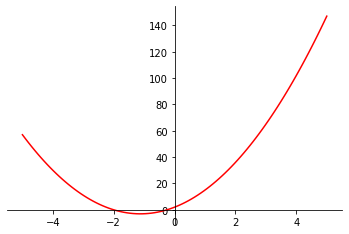

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

In [0]:
def der_df(x):
  return 8 * x + 9


In [0]:
a=[]
next_x = 2  # We start the search at x=6
max_iters = 3000  # Maximum number of iterations
# b=[]
for _i in range(max_iters):
        # print(next_x)
        current_x = next_x
        # next_x = current_x - gamma * df(current_x)
        # print(current_x)
        a.append(current_x)
        # print(gamma, current_x**2)
        next_x = current_x - gamma * der_df(current_x)
        # print(next_x)
        a.append((current_x))
        # b.append(current_x**2)
        step = next_x - current_x
        if abs(step) <= precision:
            break

In [19]:
npa = np.asarray(a, dtype=np.float32)
x.shape, npa.shape, npa

((100,),
 (6000,),
 array([ 2.        ,  2.        ,  1.9975    , ..., -0.84132487,
        -0.8415518 , -0.8415518 ], dtype=float32))

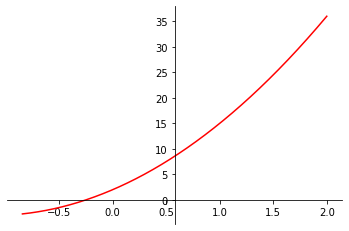

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(npa,df(npa), 'r')

# show the plot
plt.show()

## Example of Gradient Descent Optimization with MNIST Dataset

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, x_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [0]:
# MNIST dataset parameters.
num_classes = 10 # 0 to 9 digits
num_features = 784 # 28*28

# Training parameters.
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

In [0]:
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [0]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [0]:
# Weight of shape [784, 10], the 28*28 image features, and total number of classes.
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
# Bias of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")

# Logistic regression (Wx + b).
def logistic_regression(x):
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

##[Stochastic Gradient Descent in Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)

In [0]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [27]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 107.714928, accuracy: 0.906250
step: 100, loss: 80.825623, accuracy: 0.910156
step: 150, loss: 220.885681, accuracy: 0.867188
step: 200, loss: 126.397926, accuracy: 0.902344
step: 250, loss: 77.959503, accuracy: 0.906250
step: 300, loss: 79.037254, accuracy: 0.917969
step: 350, loss: 71.145309, accuracy: 0.917969
step: 400, loss: 72.157059, accuracy: 0.917969
step: 450, loss: 58.502403, accuracy: 0.921875
step: 500, loss: 71.684296, accuracy: 0.937500
step: 550, loss: 42.725975, accuracy: 0.933594
step: 600, loss: 62.998383, accuracy: 0.929688
step: 650, loss: 74.984985, accuracy: 0.925781
step: 700, loss: 65.976669, accuracy: 0.949219
step: 750, loss: 46.714462, accuracy: 0.953125
step: 800, loss: 69.506607, accuracy: 0.910156
step: 850, loss: 125.601837, accuracy: 0.875000
step: 900, loss: 39.946701, accuracy: 0.953125
step: 950, loss: 45.661194, accuracy: 0.960938
step: 1000, loss: 77.861435, accuracy: 0.921875


In [28]:
# Test model on validation set.
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.917000


In [0]:
# Visualize predictions.
import matplotlib.pyplot as plt

In [1]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

NameError: ignored